# Telco Churn Prediction
Customer churn, also known as customer attrition, is when a customer chooses to stop using your products or services. With each customer who churns, there are usually early indicators that could have been uncovered with churn analysis.

In [1]:
# Import libraries we'll need

import numpy as np 
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#show all cols
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Get the data
Data obtained from https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
# load in the data
data_path = "/Users/badisamosesane/Desktop/sais_uig/btc_customer_churn/data"
#df = pd.read_csv(f'{data_path}/WA_Fn_UseC_Telco_Customer_churn.csv')
df = pd.read_csv("/Users/badisamosesane/Desktop/sais_uig/telco_churn_prediction/data/WA_Fn_UseC_Telco_Customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Cleaning and Understanding the data
We now try to understand the data we are dealing with

In [3]:
# data types for all fields
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# View the unique data by column. 
There are a few columns we can convert to binary.

In [4]:
# print each item in df cols, see item.unique()
# gives an idea which can be converted to binary
for item in df.columns:
    print(item)
    print (df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

# convert strings to lowercase.
all strings to lower case in cols fields

In [5]:
# convert colsname to lower case, throw exception couldnt convert
for item in df.columns:
    try:
        df[item] = df[item].str.lower()
    except:
        print(item, "couldn't convert")
df.head()

SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


# Convert all yes and no to 0's & 1's so our classifier can use this data.
all cols with value yes or no, convert to 0 or 1

In [6]:
# list columns to convert
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item].replace(to_replace='yes', value=1, inplace=True)
    df[item].replace(to_replace='no',  value=0, inplace=True)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,no phone service,dsl,no,yes,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one year,0,mailed check,56.95,1889.5,0
2,3668-qpybk,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,no phone service,dsl,yes,no,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


In [7]:
# see data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

# We can see TotalCharges is still an object. Fix TotalCharges as a float...

In [8]:
# convert all entries for totalcharges field to numerics
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


# Check for NULLs

In [9]:
# check for null values on cols
df.isnull().sum(axis = 0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# fillna with zeros
df = df.fillna(value=0)

# Balance the labels so we have the same number of non-churners as churners.

In [11]:
churners_number = len(df[df['Churn'] == 1])
print("Number of churners", churners_number)

churners = (df[df['Churn'] == 1])

non_churners = df[df['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
df2 = churners.append(non_churners)

Number of churners 1869
Number of non-churners 1869


# Classifier

Are there any strong correlations?


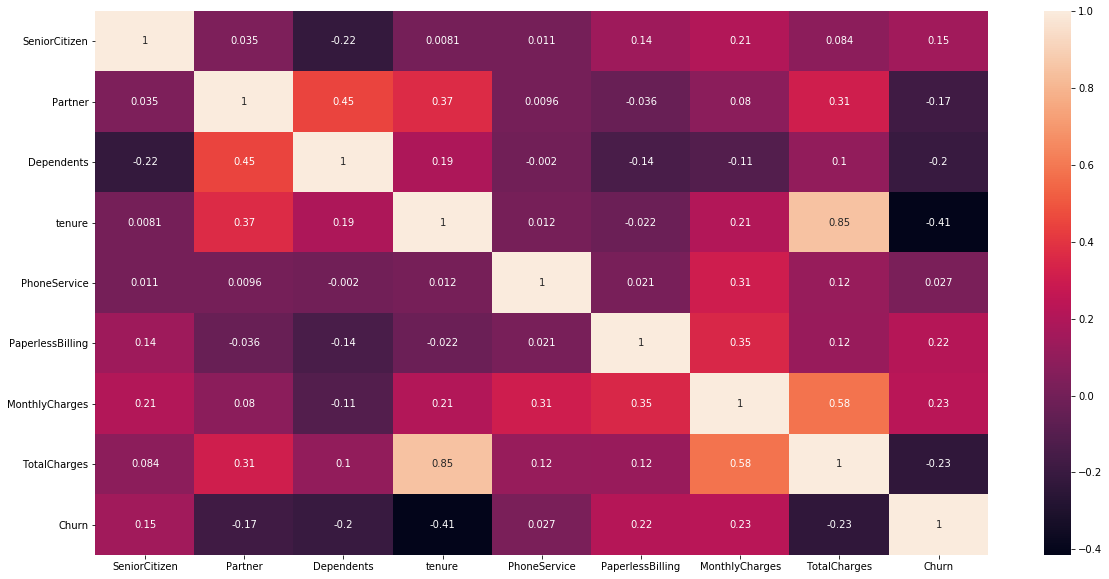

In [12]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(df2,show_chart=True)

# Building a Classifier
Now, lets build a classifier

In [13]:
try:
    customer_id = df2['customerID'] # Store this as customer_id variable
    del df2['customerID'] # Don't need in ML DF
except:
    print("already removed customerID")

In [14]:
# see the dataframe head
df2.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
4,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1
5,female,0,0,0,8,1,yes,fiber optic,no,no,yes,no,yes,yes,month-to-month,1,electronic check,99.65,820.50,1
8,female,0,1,0,28,1,yes,fiber optic,no,no,yes,yes,yes,yes,month-to-month,1,electronic check,104.80,3046.05,1
13,male,0,0,0,49,1,yes,fiber optic,no,yes,yes,no,yes,yes,month-to-month,1,bank transfer (automatic),103.70,5036.30,1


# Use one-hot encoding to convert categorical data to binary (0 or 1)

In [15]:
# get_dummies
ml_dummies = pd.get_dummies(df2)
ml_dummies.fillna(value=0, inplace=True)
ml_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,gender_male,MultipleLines_no,MultipleLines_no phone service,MultipleLines_yes,InternetService_dsl,InternetService_fiber optic,InternetService_no,OnlineSecurity_no,OnlineSecurity_no internet service,OnlineSecurity_yes,OnlineBackup_no,OnlineBackup_no internet service,OnlineBackup_yes,DeviceProtection_no,DeviceProtection_no internet service,DeviceProtection_yes,TechSupport_no,TechSupport_no internet service,TechSupport_yes,StreamingTV_no,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
2,0,0,0,2,1,1,53.85,108.15,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0,0,2,1,1,70.70,151.65,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,99.65,820.50,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
8,0,1,0,28,1,1,104.80,3046.05,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
13,0,0,0,49,1,1,103.70,5036.30,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0


In [16]:
# Add a random column to the dataframe
ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

In [17]:
# sort values
show_correlations(ml_dummies, show_chart=False)["Churn"].sort_values(ascending=False)


Churn                                      1.000000
Contract_month-to-month                    0.490284
OnlineSecurity_no                          0.394023
TechSupport_no                             0.388368
InternetService_fiber optic                0.344893
PaymentMethod_electronic check             0.327782
OnlineBackup_no                            0.314610
DeviceProtection_no                        0.292137
MonthlyCharges                             0.230414
PaperlessBilling                           0.220610
StreamingMovies_no                         0.161968
StreamingTV_no                             0.161303
SeniorCitizen                              0.154345
StreamingTV_yes                            0.061575
StreamingMovies_yes                        0.060973
MultipleLines_yes                          0.048623
PhoneService                               0.026874
gender_female                              0.008026
---randomColumn---                        -0.001718
gender_male 

<Figure size 1440x720 with 0 Axes>

In [18]:
# remove the label before training
try:
    label = ml_dummies['Churn'] # Remove the label before training the model
    del ml_dummies['Churn']
except:
    print("label already removed.")


# Using KNeighborsClassifier and DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier



KNeighborsClassifier
0.643 
 - - - - -  

DecisionTreeClassifier
0.734 
 - - - - -  



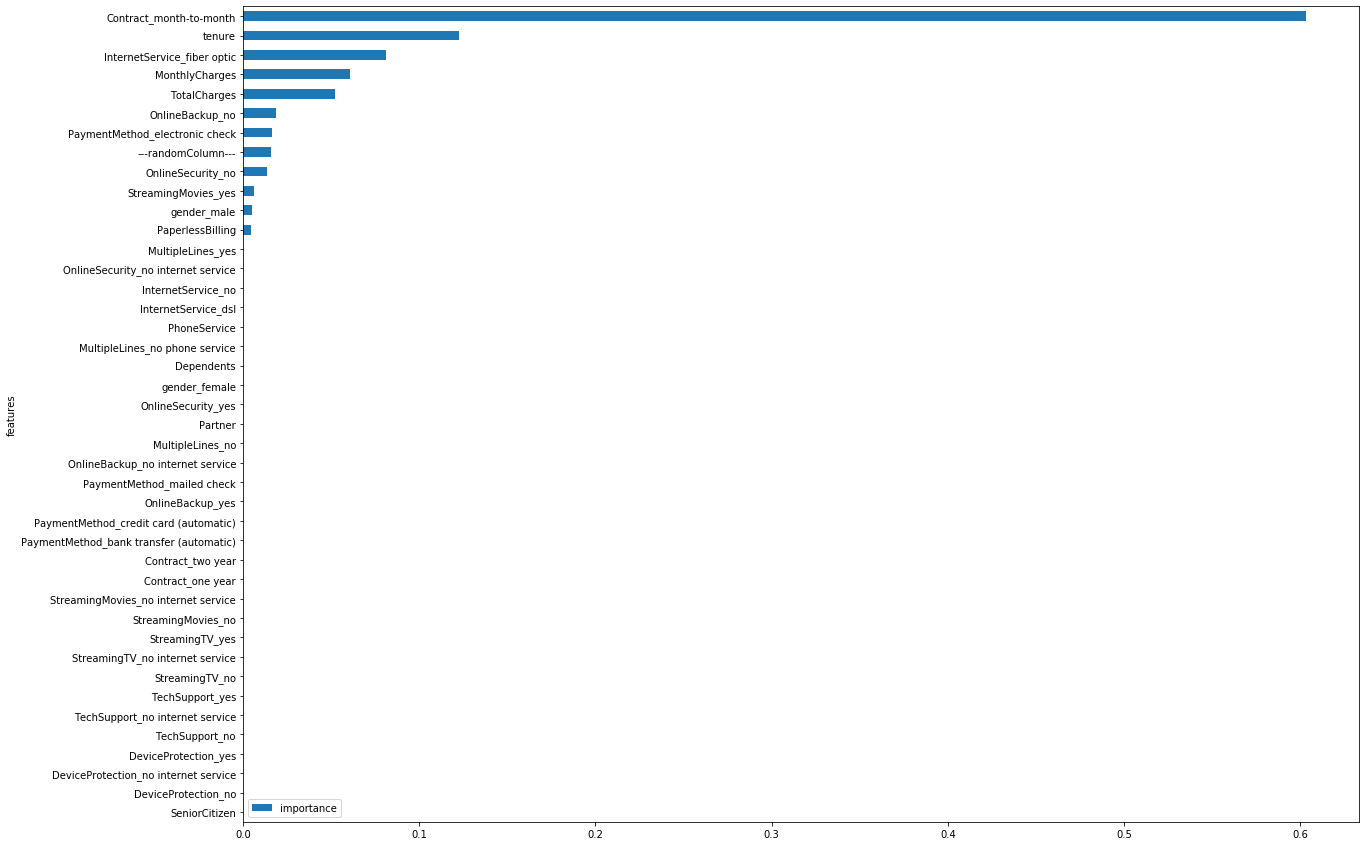

In [19]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(ml_dummies, label, test_size=0.3)

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5)
]
    

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(feature_train, label_train)
    pred = clf.predict(feature_test)
    score = clf.score(feature_test, label_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
feature_df = pd.DataFrame()
feature_df['features'] = ml_dummies.columns
feature_df['importance'] = clf.feature_importances_
feature_df.sort_values(by='importance', ascending=False)    
feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))

# Confusion Matrix
Plot the confusion matrix, with some non-normalized matrix

Confusion matrix, without normalization
[[367 200]
 [ 98 457]]
Normalized confusion matrix
[[0.65 0.35]
 [0.18 0.82]]


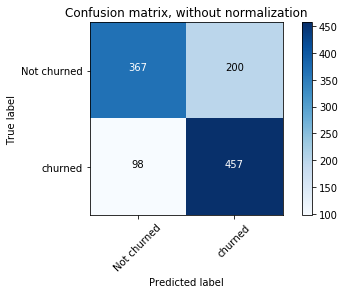

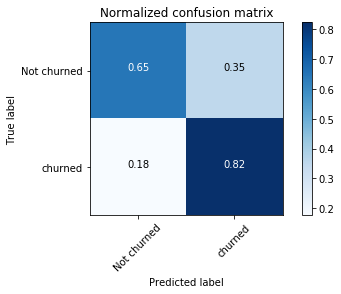

              precision    recall  f1-score   support

 Not churned       0.79      0.65      0.71       567
     churned       0.70      0.82      0.75       555

    accuracy                           0.73      1122
   macro avg       0.74      0.74      0.73      1122
weighted avg       0.74      0.73      0.73      1122



In [20]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(label_test, pred, target_names=class_names)
print(eval_metrics)

# Digging some more on the results
This result seems conservative. We're more likely to say someone is going to churn when they're not vs predicting someone's not going to churn when they do.

# Grid Search to tweak parameters

In [21]:
from sklearn.model_selection import GridSearchCV

max_depth_range = range(2,20,2)
leaf_range = range(1,10,2)
n_estimators_range = range(10,200,10)
max_features_range = range(1,len(ml_dummies.columns),5)


param_grid = dict(max_depth = max_depth_range,
                 min_samples_leaf = leaf_range,
                 n_estimators = n_estimators_range,
                 max_features = max_features_range
                )

### Warning, can take some time

# d_tree = RandomForestClassifier()
# grid = GridSearchCV(d_tree, param_grid, cv=5, scoring = 'accuracy', verbose=1, return_train_score=True)
# grid.fit(feature_train, label_train)
# print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)


# Make predictions on the dataset

In [22]:
# Preprocessing original dataframe
def preprocess_df(dataframe):
    x = dataframe.copy()
    try:
        customer_id = x['customerID']
        del x['customerID'] # Don't need in ML DF
    except:
        print("already removed customerID")
    ml_dummies = pd.get_dummies(x)
    ml_dummies.fillna(value=0, inplace=True)

    # import random done above
    ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

    try:
        label = ml_dummies['Churn']
        del ml_dummies['Churn']
    except:
        print("label already removed.")
    return ml_dummies, customer_id, label

original_df = preprocess_df(df)

In [23]:
output_df = original_df[0].copy()
output_df['---randomColumn---']
output_df['prediction'] = clf.predict_proba(output_df)[:,1]
output_df['churn'] = original_df[2]
output_df['customerID'] = original_df[1]

In [24]:
print('Mean predict proba of churn:',round(output_df[output_df['churn'] == 1]['prediction'].mean(),2))

print('Mean predict proba of NON-churn:',round(output_df[output_df['churn'] == 0]['prediction'].mean(),2))

Mean predict proba of churn: 0.7
Mean predict proba of NON-churn: 0.33


# Use this next dataframe for activation. 
Using media, let's target the customers who haven't churned but are likely to.

In [25]:
# activate
activate = output_df[output_df['churn'] == 0]
activate[['customerID','churn','prediction']]

,customerID,churn,prediction
0,7590-vhveg,0,0.806283
1,5575-gnvde,0,0.043478
3,7795-cfocw,0,0.043478
6,1452-kiovk,0,0.468750
7,6713-okomc,0,0.516129
9,6388-tabgu,0,0.043478
10,9763-grskd,0,0.516129
11,7469-lkbci,0,0.043478
12,8091-ttvax,0,0.937500
14,5129-jlpis,0,0.782857
